# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [2]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import matplotlib.pyplot as plt
import numpy as np

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

### Data visualization

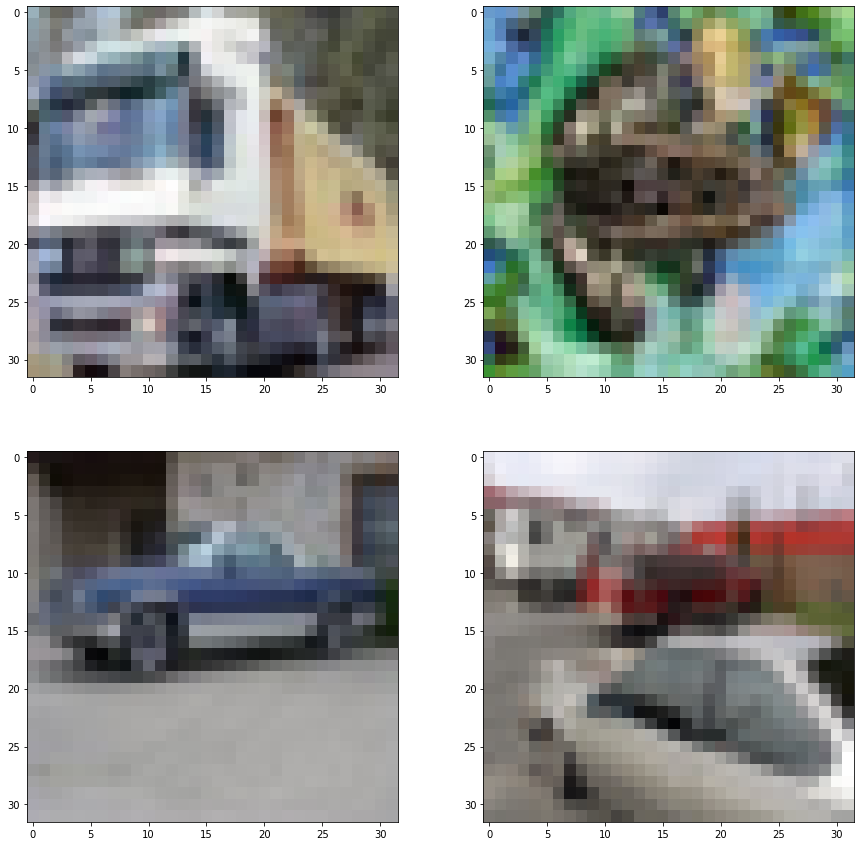

In [3]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(x_train[1])
ax[0,1].imshow(x_train[200])
ax[1,0].imshow(x_train[10000])
ax[1,1].imshow(x_train[49999])

### AlexNet CNN architecture

####Imports

In [4]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from keras.layers.normalization import BatchNormalization

####Model building

#####Model 1

In [5]:
# Inputs need to be RGB images of arbitrary size
inputs = keras.Input(shape=(32, 32, 3))

In [6]:
# Center-crop images
#l1 = CenterCrop(height=32, width=32)(inputs)
# Rescale images to [0, 1]
#l2 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=96, strides=4, kernel_size=(11, 11), padding="same", activation="relu")(inputs)
l4 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l3)
l5 = layers.Conv2D(filters=256,strides=4, kernel_size=(5, 5), padding="same", activation="relu")(l4)
l6 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l5)
l7 = layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu")(l6)
l8 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l7)

l9 = layers.Flatten()(l8)

l10 = layers.Dense(4096, activation='relu')(l9)
l11 = layers.Dropout(rate=0.5)(l10)

l12 = layers.Dense(4096, activation='relu')(l11)
l13 = layers.Dropout(rate=0.5)(l12)

outputs = layers.Dense(10)(l13)

In [7]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 384)         885120    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 384)         0     

In [8]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

In [9]:
normalizer = Normalization(axis=-1)
normalizer.adapt(x_train)

normalized_data = normalizer(x_train)

fitted_model = model.fit(normalized_data, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 44s 7ms/step - loss: 0.0925 - accuracy: 0.1159 - val_loss: 3.5819 - val_accuracy: 0.1003
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0887 - accuracy: 0.1868 - val_loss: 13.3946 - val_accuracy: 0.0999
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0866 - accuracy: 0.2346 - val_loss: 26.9828 - val_accuracy: 0.1054
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0846 - accuracy: 0.2590 - val_loss: 36.5544 - val_accuracy: 0.1163
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0830 - accuracy: 0.2928 - val_loss: 52.1789 - val_accuracy: 0.1244
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0812 - accuracy: 0.3208 - val_loss: 61.9578 - val_accuracy: 0.1459
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0796 - accuracy: 0.3513 - val_loss: 72.5659 - 

In [10]:
#dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

#val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
y_predicted=model.predict(x_test,batch_size=batch_size)


loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

313/313 [==============================] - 1s 3ms/step - loss: 100.8824 - accuracy: 0.2015
loss: 100.88
acc: 0.20


#####Model 2

In [11]:
# Inputs need to be RGB images of arbitrary size
inputs = keras.Input(shape=(32, 32, 3))
# Center-crop images
#l1 = CenterCrop(height=32, width=32)(inputs)
# Rescale images to [0, 1]
#l2 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=96, strides=4, kernel_size=(11, 11), padding="same")(inputs)
l4 = layers.ReLU()(l3)
l5 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l4)
l6 = layers.LayerNormalization()(l5)

l7 = layers.Conv2D(filters=256,strides=4, kernel_size=(5, 5), padding="same")(l6)
l8 = layers.ReLU()(l7)
l9 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l8)
l10 = layers.LayerNormalization()(l9)

l11 = layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same")(l10)
l12 = layers.ReLU()(l11)
l13 = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(l12)
l14 = layers.LayerNormalization()(l13)

l15 = layers.Flatten()(l14)

l16 = layers.Dense(4096)(l15)
l17 = layers.ReLU()(l16)
l18 = layers.Dropout(rate=0.5)(l17)

l19 = layers.Dense(4096)(l18)
l20 = layers.ReLU()(l19)
l21 = layers.Dropout(rate=0.5)(l20)

outputs = layers.Dense(10)(l21)

model_2 = keras.Model(inputs=inputs, outputs=outputs)

model_2.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])


fitted_model = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=model_2.predict(x_test,batch_size=batch_size)

loss, acc = model_2.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1299 - accuracy: 0.1442 - val_loss: 0.0805 - val_accuracy: 0.3572
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0826 - accuracy: 0.2948 - val_loss: 0.0765 - val_accuracy: 0.3993
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0791 - accuracy: 0.3606 - val_loss: 0.0739 - val_accuracy: 0.4202
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0760 - accuracy: 0.4023 - val_loss: 0.0716 - val_accuracy: 0.4367
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0736 - accuracy: 0.4346 - val_loss: 0.0689 - val_accuracy: 0.4649
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0715 - accuracy: 0.4573 - val_loss: 0.0680 - val_accuracy: 0.4772
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0694 - accuracy: 0.4755 - val_loss: 0.0656 - val_ac

#####Model 3

In [12]:
# Inputs need to be RGB images of arbitrary size
inputs = keras.Input(shape=(32, 32, 3))
# Center-crop images
#l1 = CenterCrop(height=32, width=32)(inputs)
# Rescale images to [0, 1]
#l2 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=96, strides=(4,4), kernel_size=(11, 11), padding="same")(inputs)
l4 = layers.ReLU()(l3)
l5 = layers.LayerNormalization()(l4)
l6 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l5)


l7 = layers.Conv2D(filters=256,strides=(4,4), kernel_size=(5, 5), padding="same")(l6)
l8 = layers.ReLU()(l7)
l9 = layers.LayerNormalization()(l8)
l10 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l9)


l11 = layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same")(l10)
l12 = layers.ReLU()(l11)
l13 = layers.LayerNormalization()(l12)
l14 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l13)


l15 = layers.Flatten()(l14)

l16 = layers.Dense(4096)(l15)
l17 = layers.ReLU()(l16)
l18 = layers.Dropout(rate=0.5)(l17)

l19 = layers.Dense(4096)(l18)
l20 = layers.ReLU()(l19)
l21 = layers.Dropout(rate=0.5)(l20)

outputs = layers.Dense(10)(l21)

model_3 = keras.Model(inputs=inputs, outputs=outputs)

model_3.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])


fitted_model = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=model_3.predict(x_test,batch_size=batch_size)

loss, acc = model_3.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1272 - accuracy: 0.1548 - val_loss: 0.0795 - val_accuracy: 0.3596
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0816 - accuracy: 0.3125 - val_loss: 0.0754 - val_accuracy: 0.4136
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0775 - accuracy: 0.3824 - val_loss: 0.0727 - val_accuracy: 0.4304
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0746 - accuracy: 0.4250 - val_loss: 0.0713 - val_accuracy: 0.4420
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0724 - accuracy: 0.4500 - val_loss: 0.0674 - val_accuracy: 0.4841
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0699 - accuracy: 0.4711 - val_loss: 0.0649 - val_accuracy: 0.5022
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0678 - accuracy: 0.4943 - val_loss: 0.0639 - val_ac

#####Model 4

In [13]:
# Inputs need to be RGB images of arbitrary size
inputs = keras.Input(shape=(32, 32, 3))
# Center-crop images
#l1 = CenterCrop(height=32, width=32)(inputs)
# Rescale images to [0, 1]
#l2 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=96, strides=(4,4), kernel_size=(11, 11), padding="same")(inputs)
l4 = layers.ReLU()(l3)
l5 = layers.LayerNormalization()(l4)
l6 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l5)


l7 = layers.Conv2D(filters=256,strides=(4,4), kernel_size=(5, 5), padding="same")(l6)
l8 = layers.ReLU()(l7)
l9 = layers.LayerNormalization()(l8)
l10 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l9)


l11 = layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same")(l10)
l12 = layers.ReLU()(l11)
l13 = layers.LayerNormalization()(l12)
l14 = layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same')(l13)


l15 = layers.Flatten()(l14)

l16 = layers.Dense(4096)(l15)
l17 = layers.ReLU()(l16)
l18 = layers.Dropout(rate=0.2)(l17)

l19 = layers.Dense(4096)(l18)
l20 = layers.ReLU()(l19)
l21 = layers.Dropout(rate=0.2)(l20)

outputs = layers.Dense(10)(l21)

model_4 = keras.Model(inputs=inputs, outputs=outputs)

model_4.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])


fitted_model = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=model_4.predict(x_test,batch_size=batch_size)

loss, acc = model_4.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1020 - accuracy: 0.2078 - val_loss: 0.0770 - val_accuracy: 0.3827
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0776 - accuracy: 0.3918 - val_loss: 0.0718 - val_accuracy: 0.4305
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0724 - accuracy: 0.4473 - val_loss: 0.0687 - val_accuracy: 0.4647
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0689 - accuracy: 0.4844 - val_loss: 0.0654 - val_accuracy: 0.5032
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0665 - accuracy: 0.5078 - val_loss: 0.0634 - val_accuracy: 0.5150
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0643 - accuracy: 0.5267 - val_loss: 0.0653 - val_accuracy: 0.4986
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0620 - accuracy: 0.5482 - val_loss: 0.0603 - val_ac

#####Model 5

In [14]:
model_5 = keras.Sequential(name="my_sequential")

model_5.add(keras.Input(shape=(32, 32, 3)))

# Apply some convolution and pooling layers
model_5.add(layers.Conv2D(filters=96, strides=(4,4), kernel_size=(11, 11), padding="valid"))
model_5.add(layers.Activation('relu'))

model_5.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))


model_5.add(layers.Conv2D(filters=256,strides=(4,4), kernel_size=(5, 5), padding="same"))
model_5.add(layers.Activation('relu'))
model_5.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))


model_5.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same"))
model_5.add(layers.Activation('relu'))
model_5.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))


model_5.add(layers.Flatten())

model_5.add(layers.Dense(4096))
model_5.add(layers.Activation('relu'))
model_5.add(layers.Dropout(rate=0.2))

model_5.add(layers.Dense(4096))
model_5.add(layers.Activation('relu'))
model_5.add(layers.Dropout(rate=0.2))

model_5.add(layers.Dense(10))
model_5.add(layers.Activation('softmax'))

model_5.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

model_5.summary()


Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 6, 6, 96)          34944     
_________________________________________________________________
activation (Activation)      (None, 6, 6, 96)          0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 1, 1, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 256)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 384)       

In [15]:
model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=model_5.predict(x_test,batch_size=batch_size)

loss, acc = model_5.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0879 - accuracy: 0.1744 - val_loss: 0.0804 - val_accuracy: 0.3129
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0803 - accuracy: 0.3134 - val_loss: 0.0759 - val_accuracy: 0.3726
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0765 - accuracy: 0.3601 - val_loss: 0.0739 - val_accuracy: 0.3889
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0734 - accuracy: 0.3978 - val_loss: 0.0715 - val_accuracy: 0.4151
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0708 - accuracy: 0.4287 - val_loss: 0.0699 - val_accuracy: 0.4388
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0691 - accuracy: 0.4476 - val_loss: 0.0720 - val_accuracy: 0.4173
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0671 - accuracy: 0.4667 - val_loss: 0.0673 - val_ac

#####Model final AlexNet

In [61]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

AlexNet.add(keras.Input(shape=(32, 32, 3)))

#data rescaling for deep learning
# AlexNet.add(Rescaling(scale=1.0 / 255)) Here it reduce my accuracy !!

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

AlexNet.build()

#Model Summary
AlexNet.summary()

AlexNet.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

AlexNet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=AlexNet.predict(x_test,batch_size=batch_size)

loss, acc = AlexNet.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_99 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_105 (Activation)  (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_100 (Bat (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_106 (Activation)  (None, 4, 4, 256)       

In [62]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

AlexNet.add(keras.Input(shape=(32, 32, 3)))

#data rescaling for deep learning
# AlexNet.add(Rescaling(scale=1.0 / 255)) Here it reduce my accuracy !!

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#AlexNet.build()

#Model Summary
AlexNet.summary()

AlexNet.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

AlexNet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=AlexNet.predict(x_test,batch_size=batch_size)

loss, acc = AlexNet.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_108 (Bat (None, 8, 8, 96)          384       
_________________________________________________________________
activation_114 (Activation)  (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_109 (Bat (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_115 (Activation)  (None, 4, 4, 256)       

####Confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[<matplotlib.axis.YTick at 0x7f2a094b2210>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'test')]

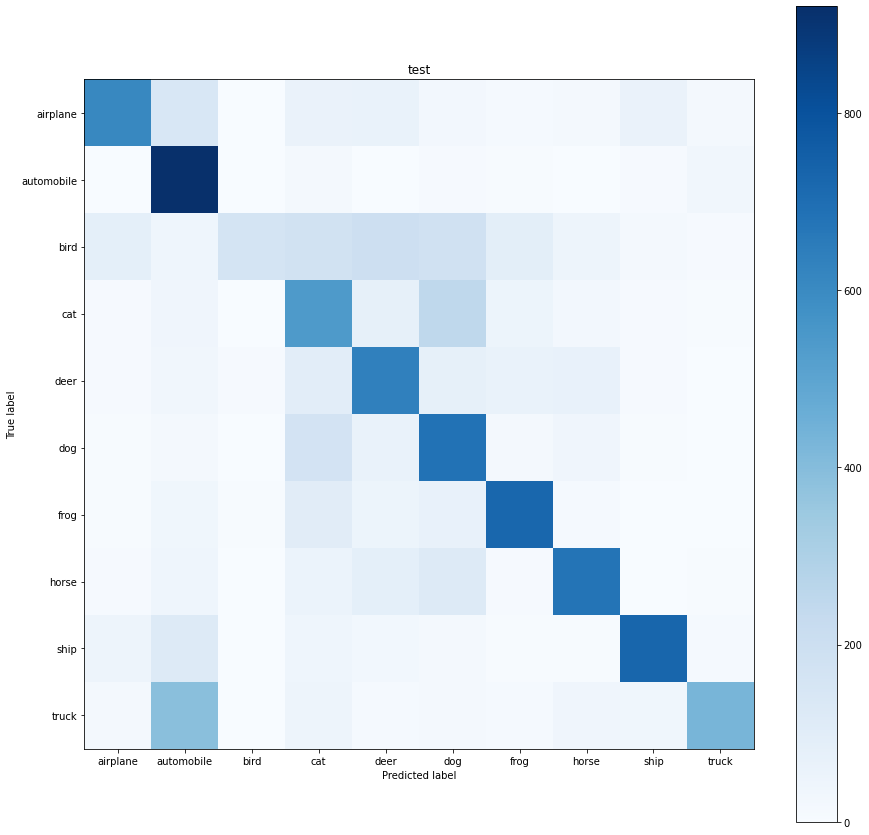

In [63]:
#Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_mtx.shape[1]),
           yticks=np.arange(confusion_mtx.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='test',
           ylabel='True label',
           xlabel='Predicted label')


####Data augmentation

In [64]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

In [65]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)


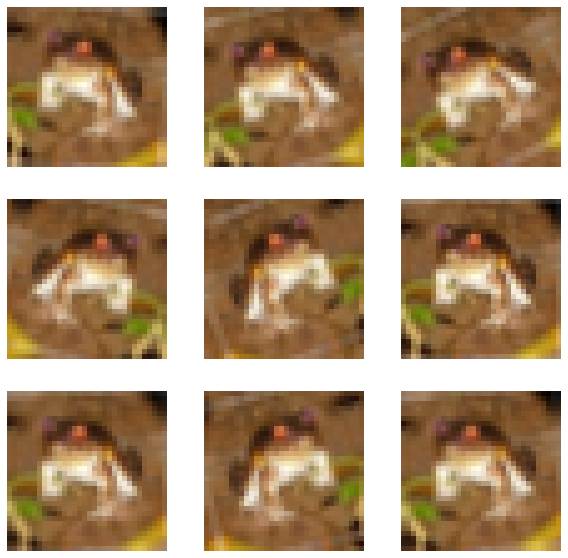

In [66]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [67]:
augmented_train_ds = train_dataset.map(
  lambda x, y: (data_augmentation(x, training=True), y))


In [68]:
AlexNet.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

AlexNet.fit(augmented_train_ds, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

y_predicted=AlexNet.predict(x_test,batch_size=batch_size)

loss, acc = AlexNet.evaluate(x_test, y_test, batch_size=batch_size)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)


Epoch 1/10
1563/1563 [==============================] - 24s 14ms/step - loss: 1.2262 - accuracy: 0.5733 - val_loss: 1.1823 - val_accuracy: 0.6026
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1168 - accuracy: 0.6036 - val_loss: 1.1804 - val_accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0867 - accuracy: 0.6135 - val_loss: 1.0588 - val_accuracy: 0.6342
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0537 - accuracy: 0.6323 - val_loss: 1.3498 - val_accuracy: 0.5673
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0288 - accuracy: 0.6424 - val_loss: 1.1064 - val_accuracy: 0.6231
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0106 - accuracy: 0.6432 - val_loss: 1.2936 - val_accuracy: 0.5869
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9891 - accuracy: 0.6526 - val_loss: 1.2821 -

In [95]:
def build_model(hp):
  #Instantiation
  AlexNet = Sequential()

  AlexNet.add(keras.Input(shape=(32, 32, 3)))

  #data rescaling for deep learning
  # AlexNet.add(Rescaling(scale=1.0 / 255)) Here it reduce my accuracy !!

  #1st Convolutional Layer
  AlexNet.add(Conv2D(filters=hp.Choice('num_filters',values=[50, 96],default=96), kernel_size=(11,11), strides=(4,4), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #2nd Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #3rd Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #4th Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #5th Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #Passing it to a Fully Connected layer
  AlexNet.add(Flatten())
  # 1st Fully Connected Layer
  AlexNet.add(Dense(units=hp.Int('units',min_value=2000,max_value=5000,step=1000,default=4096)))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  AlexNet.add(Dropout(0.4))

  #2nd Fully Connected Layer
  AlexNet.add(Dense(units=hp.Int('units',min_value=2000,max_value=5000,step=1000,default=4096)))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout
  AlexNet.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.4,step=0.2)))

  #3rd Fully Connected Layer
  AlexNet.add(Dense(4096))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout
  AlexNet.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.5,default=0.4,step=0.2)))

  #Output Layer
  AlexNet.add(Dense(10))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('softmax'))

  AlexNet.compile(optimizer=keras.optimizers.SGD(hp.Float('learning_rate',min_value=1e-2,max_value=2e-2,sampling='LOG',default=1.5e-2)), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [89]:
pip install -q -U keras-tuner

In [104]:
import kerastuner
 
tuner = kerastuner.tuners.RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=5,
  executions_per_trial=2,
  directory='my_dir')

INFO:tensorflow:Reloading Oracle from existing project my_dir/untitled_project/oracle.json


In [105]:
tuner.search(augmented_train_ds, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.10000000149011612
Total elapsed time: 00h 03m 00s
INFO:tensorflow:Oracle triggered exit


In [106]:
best_model = tuner.get_best_models(num_models=2)

In [107]:
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_filters: 50
units: 4000
dropout_1: 0.2
dropout_2: 0.4
learning_rate: 0.013047839464996429
Score: 0.10000000149011612
Trial summary
Hyperparameters:
num_filters: 50
units: 4000
dropout_1: 0.0
dropout_2: 0.2
learning_rate: 0.0141084889660249
Score: 0.10000000149011612
Trial summary
Hyperparameters:
num_filters: 50
units: 3000
dropout_1: 0.2
dropout_2: 0.4
learning_rate: 0.013074932429197548
Score: 0.10000000149011612
Trial summary
Hyperparameters:
num_filters: 96
units: 2000
dropout_1: 0.4
dropout_2: 0.2
learning_rate: 0.011633778370231735
Score: 0.10000000149011612
Trial summary
Hyperparameters:
num_filters: 50
units: 4000
dropout_1: 0.4
dropout_2: 0.2
learning_rate: 0.013015771359591585
Score: 0.10000000149011612
